In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### comment: these are the comments made by the developers 
### comment_date: the date when the comments where made
### is_merged : pull accepted or not   1- Accepted   0- Not Accepted 
### merged_at : if Accepted ie, if is_merged is 1 then the date when it was merged
### request_changes: if the comments are requests for changes  1:True 0:False


In [324]:
data= pd.read_csv("github_comments.tsv",sep='\t',usecols=['comment','comment_date','is_merged','merged_at','request_changes'])

### DATA TYPES

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 5 columns):
comment            4001 non-null object
comment_date       4001 non-null object
is_merged          4001 non-null float64
merged_at          1159 non-null object
request_changes    4001 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 156.4+ KB


In [17]:
data["is_merged"].value_counts()

0.0    2842
1.0    1159
Name: is_merged, dtype: int64

### no.of pulls accepted(is_merged ==1) and merged_at are equal 1159 hence there are no missing values

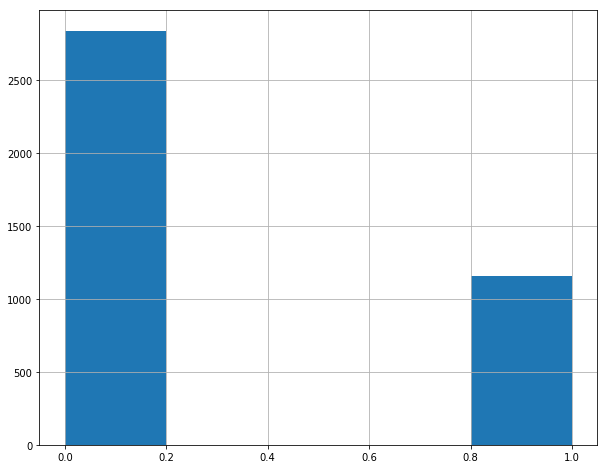

In [13]:
data["is_merged"].hist(bins=5, figsize=(10,8))
plt.show()

### Lets check how many comments are requests for changes

In [17]:
data["request_changes"].value_counts(1)*100

0    69.507623
1    30.492377
Name: request_changes, dtype: float64

Out of 4001 there are only 30.5% request for change comments
Hence most of the comments are not request comments in the dataset

### Lets check the dates

#### Lets change the merged_at datafield to datatype and droping the NA values

In [28]:
merged_at=pd.to_datetime(data["merged_at"])
merged_at=merged_at.dropna()

In [30]:
merged_at.head()

1   2017-05-25 20:34:27
2   2017-05-25 19:05:10
4   2017-05-24 04:40:42
5   2017-05-24 04:40:42
6   2017-05-24 04:40:42
Name: merged_at, dtype: datetime64[ns]

In [37]:
def plotting(field):
    plt.figure(figsize=(8,6))
    sns.countplot(field.sort_values())
    loc,labels=plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    plt.show()

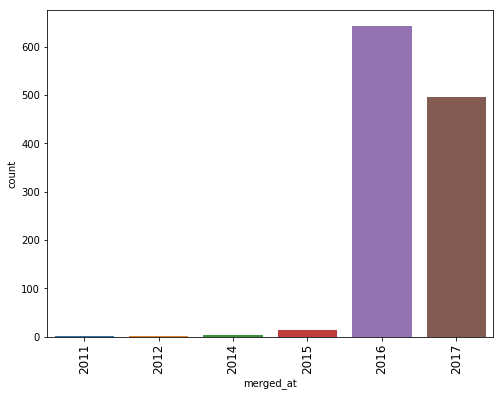

In [63]:
plotting(merged_at.dt.year)

#### Wow!! Most of the merges are in 2016 and 2017

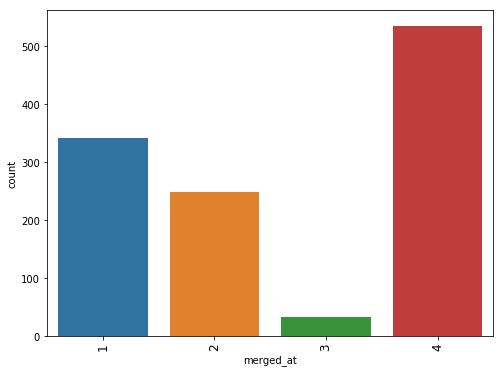

In [40]:
plotting(merged_at.dt.quarter)

#### Most of the merges are in the 4 th quarter and least in 3rd quarter
Looks like blockers are inactive during 3rd quarter
##### Lets see which months specifically

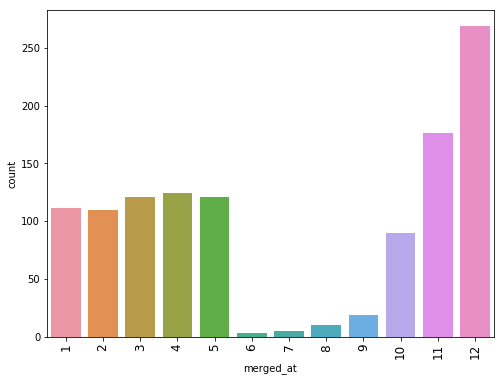

In [41]:
plotting(merged_at.dt.month)

##### Interesting! Merges seem to have most acceptence during november and december.
##### The whole years work is paying off in the last two months and
##### There are very few acceptances in june and july (Time for Summer Break!!!)
##### Lets go deeper 

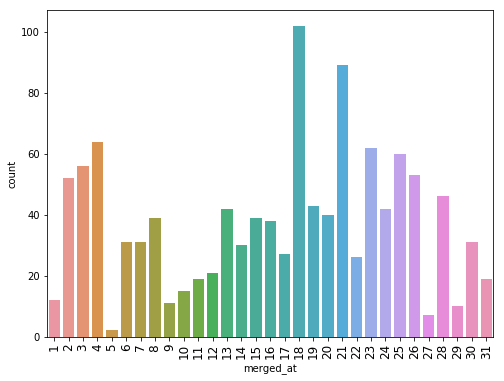

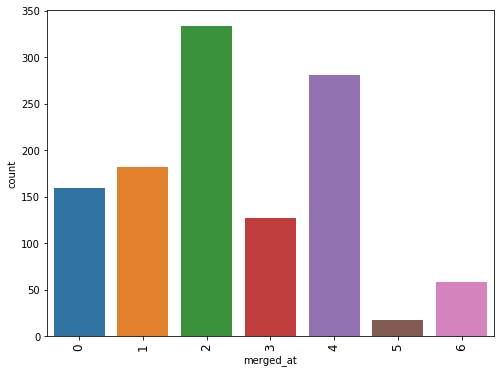

In [49]:
plotting(merged_at.dt.day)
plotting(merged_at.dt.dayofweek)

##### Looks like 3rd week of the month ,  Tuesdays and Thursdays have most accepted merges

### Thats enough lets jump to comments

In [53]:
comments=pd.to_datetime(data["comment_date"])


In [61]:
comments.isnull().value_counts()

False    4001
Name: comment_date, dtype: int64

GOOD there are no null values 

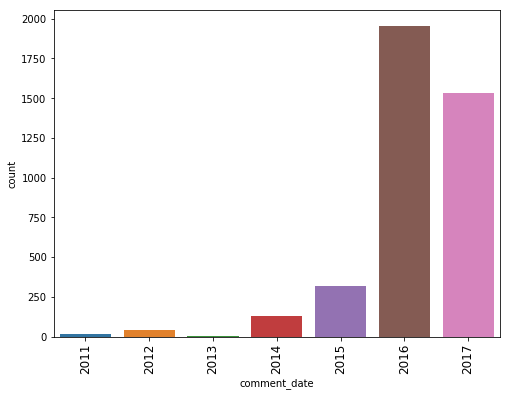

In [67]:
plotting(comments.dt.year)

From merged_at is was clear that Most of the comments are in 2016 and 2017 and its verified here

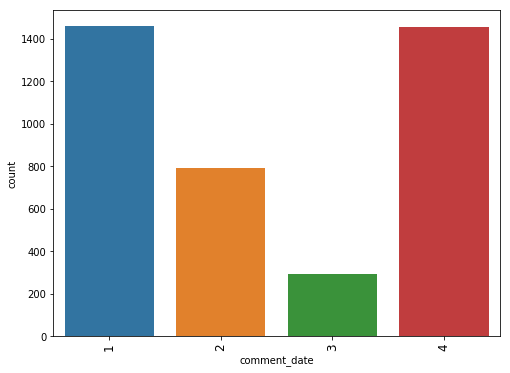

In [68]:
plotting(comments.dt.quarter)

##### There are good number of comments in first and fourth quarter

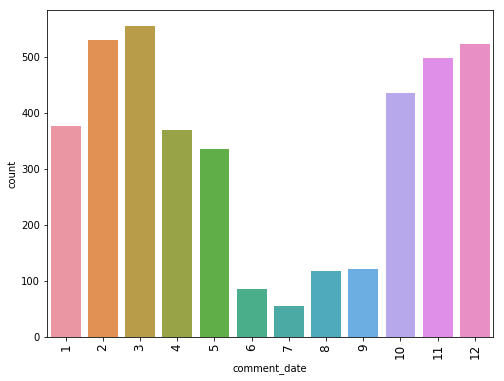

In [73]:
plotting(comments.dt.month)

#### November , December , Feb, March seems to be most commented months with July being the least

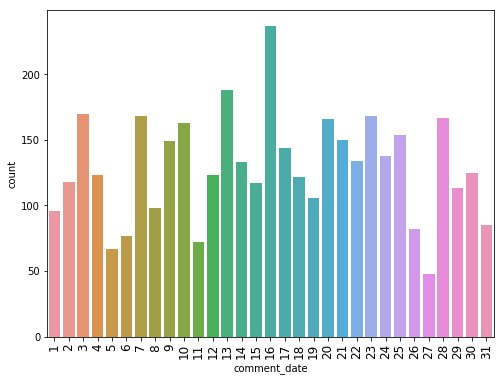

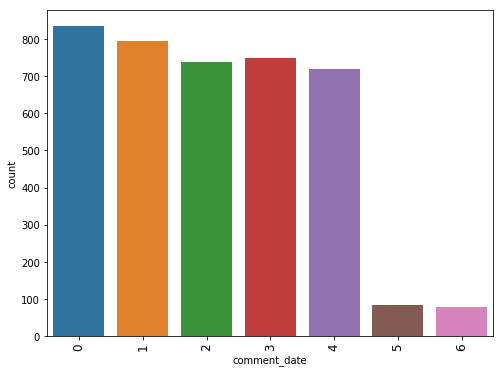

In [72]:
plotting(comments.dt.day)
plotting(comments.dt.dayofweek)

#### Sunday , Monday , Tuesday , Wednesday , Thursday  are the most commented days and there is an interesting observation 16th day of everymonth has highest comments looks like the blockers update their work/ comment every fortnight

In [74]:
data.head()

,comment,comment_date,is_merged,merged_at,request_changes
0,@chef/maintainers,2017-05-29 10:54:23,0.0,NaN,0
1,omnibus builds are already in pain so merging ...,2017-05-25 20:34:45,1.0,2017-05-25 20:34:27,0
2,@chef/client-core reviewage (lets not think to...,2017-05-25 17:21:56,1.0,2017-05-25 19:05:10,0
3,This blows up 14.04 because allow-downgrades i...,2017-05-25 19:15:14,0.0,NaN,1
4,I know @lamont-granquist and @thommay are goi...,2017-05-23 22:58:13,1.0,2017-05-24 04:40:42,0


#### Lets see comments which are requests for changes

In [76]:
comments_which_are_requests_for_change= data[data["request_changes"]==1]

In [106]:
comments_rfc=comments_which_are_requests_for_change["comment_date"]
comments_rfc.count()

1220

In [82]:
def plots(field):
    field=pd.to_datetime(field)
    plotting(field.dt.year)
    plotting(field.dt.quarter)
    plotting(field.dt.month)
    plotting(field.dt.day)
    plotting(field.dt.dayofweek)
    

In [84]:
comments_rfc=pd.to_datetime(comments_rfc)

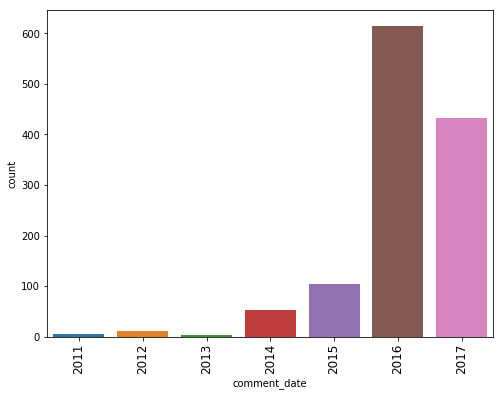

In [85]:
plotting(comments_rfc.dt.year)

#### Its obvious by now that the data is mostly from 2016 and 2017 so the comments that are request for change were more in 2016 and 2017 

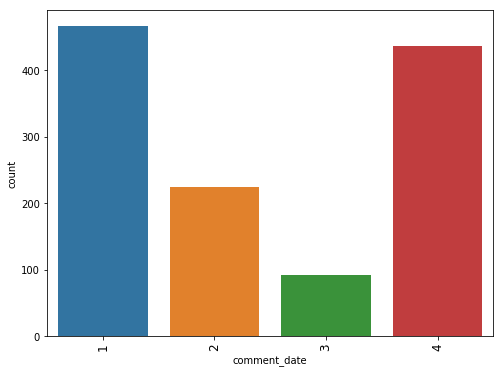

In [86]:
plotting(comments_rfc.dt.quarter)

#### First quarter has maximum request for changes than fourth quarter

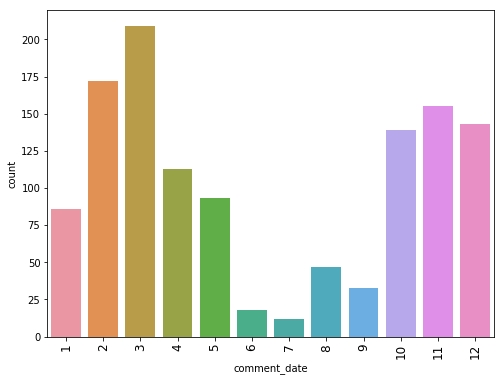

In [87]:
plotting(comments_rfc.dt.month)

March has the highest requests for changes and july has the least

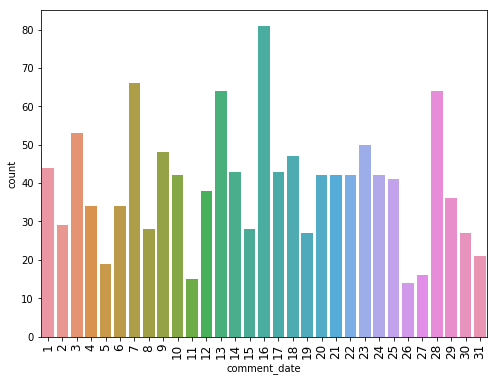

In [88]:
plotting(comments_rfc.dt.day)

#### once again 16th day has highest request for change we need to understand the reasons behind it

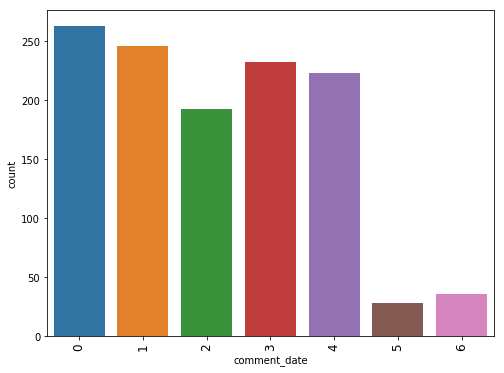

In [91]:
plotting(comments_rfc.dt.dayofweek)

#### Sunday has the highest request for change code comments

### Lets try to analyse  the comments which were merged and were requests for changes

In [92]:
comments_rfc.count()

1220

In [93]:
merged_at.count()

1159

In [103]:
data_rfc_merged=comments_which_are_requests_for_change[comments_which_are_requests_for_change["is_merged"]==1.0]

In [104]:
data_rfc_merged.count()

comment            284
comment_date       284
is_merged          284
merged_at          284
request_changes    284
dtype: int64

So there are 284 comments that were requested for change and were merged

In [115]:
dates_erf_merged=pd.to_datetime(data_rfc_merged["merged_at"])

In [ ]:
def plots(field):
    field=pd.to_datetime(field)
    plotting(field.dt.year)
    plotting(field.dt.quarter)
    plotting(field.dt.month)
    plotting(field.dt.day)
    plotting(field.dt.dayofweek)

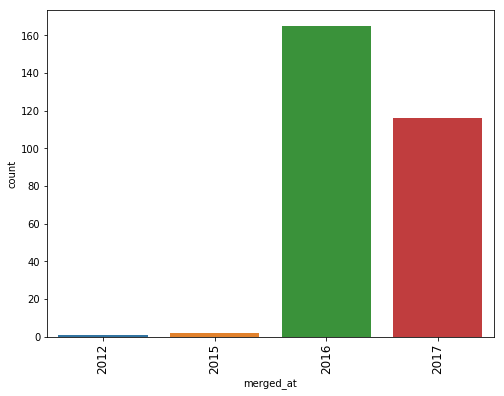

In [116]:
plotting(dates_erf_merged.dt.year)

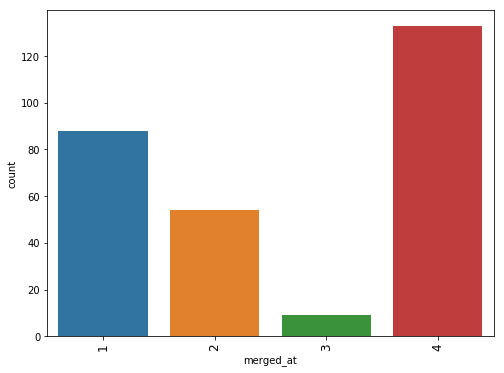

In [117]:
plotting(dates_erf_merged.dt.quarter)

### the comments are highest in 4th quarter

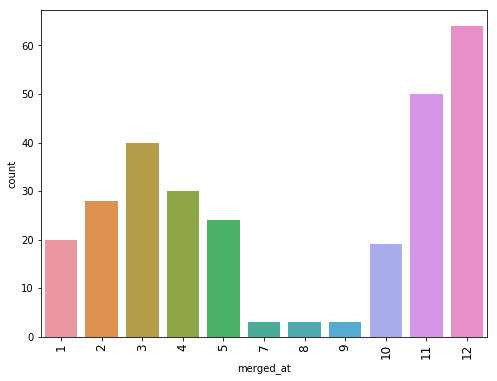

In [118]:
plotting(dates_erf_merged.dt.month)

#### They are maximum in december month

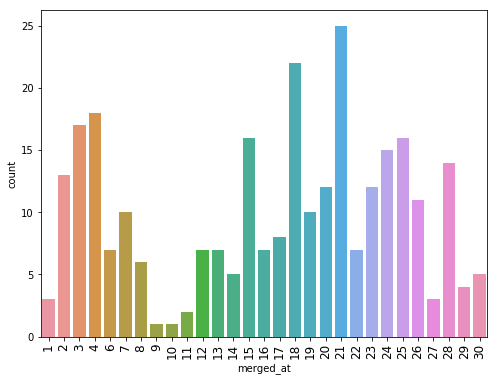

In [119]:
plotting(dates_erf_merged.dt.day)

#### Highest requests for changes were merged on 21st

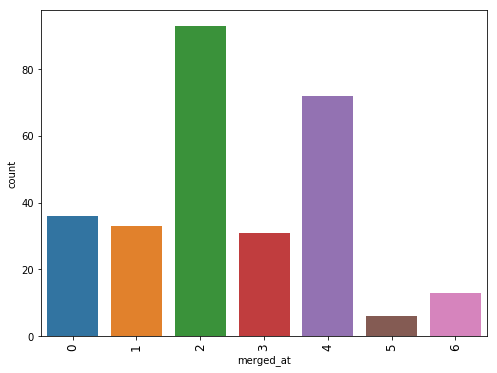

In [120]:
plotting(dates_erf_merged.dt.dayofweek)

### Highest RFC were merged on tuesday

In [121]:
data_rfc_merged.head()

,comment,comment_date,is_merged,merged_at,request_changes
24,This is a super frustrating bug that I'd love ...,2017-05-15 21:53:38,1.0,2017-05-16 08:59:50,1
27,Looks like it was actually always broken with ...,2017-05-15 23:07:46,1.0,2017-05-16 08:59:50,1
410,Looks good to me beyond the minor cosmetic iss...,2016-07-27 14:01:24,1.0,2016-07-27 20:59:27,1
411,Remove blank line.\n,2016-07-27 13:58:10,1.0,2016-07-27 20:59:27,1
412,Maybe add some brief JavaDoc to the individual...,2016-07-27 13:58:48,1.0,2016-07-27 20:59:27,1


In [131]:
val=(pd.to_datetime(data_rfc_merged["request_changes"])-dates_erf_merged )

In [141]:
time=(val.dt.seconds/360)

In [143]:
time.mean()/24

3.7875595005216467

## Average resolution time is 3.7 days

#### Now lets clean the comments to understand it

In [318]:
data=data_rfc_merged["comment"]
my_data['pre_clean_len'] = [len(t) for t in my_data.text]

In [319]:
def clean_comment(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    strip = re.sub(combined_partition, '', bom_removed)
    strip = re.sub(www_pat, '', strip)
    lower_case = strip.lower()
    letters_only = re.sub("[^a-zA-Z]", " ", lower_case)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [320]:
from bs4 import BeautifulSoup
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
partition1 = r'@[A-Za-z0-9]+'
partitiont2 = r'https?://[A-Za-z0-9./]+'
combined_partition = r'|'.join((partition1, partitiont2))
www_pat = r'www.[^ ]+'

In [325]:
data['pre_clean_len'] = [len(t) for t in data.comment]

In [326]:
from pprint import pprint
data_dict = {
    
    'text':{
        'type':data.comment.dtype,
        'description':'comment text'
    },
    'pre_clean_len':{
        'type':data.pre_clean_len.dtype,
        'description':'Length of the comment before cleaning'
    },
    'dataset_shape':data.shape
}
pprint(data_dict)

{'dataset_shape': (4001, 6),
 'pre_clean_len': {'description': 'Length of the comment before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'comment text', 'type': dtype('O')}}


In [327]:
import re
print ("Cleaning and parsing the comments...\n")
cleaned_comments = []
for i in range(len(data)):                                                              
    cleaned_comments.append(clean_comment(data['comment'][i]))

Cleaning and parsing the comments...



A:\Anaconda\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://hibernate.atlassian.net/browse/HBX-1225
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
A:\Anaconda\lib\site-packages\bs4\__init__.py:336: UserWarning: "http://lucene.apache.org/core/5_5_4/core/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
A:\Anaconda\lib\site-packages\bs4\__init__.py:336: UserWarning: "https://hibernate.atlassian.net/browse/HV-1328" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful

In [328]:
cleaned_my_data = pd.DataFrame(cleaned_comments,columns=['text'])

cleaned_my_data.head()



,text
0,maintainers
1,omnibus builds are already in pain so merging ...
2,client core reviewage lets not think too hard ...
3,this blows up because allow downgrades is not ...
4,know granquist and are going to be unhappy abo...


In [329]:
words = []
for t in cleaned_my_data.text:
    words.append(t)
words_string = pd.Series(words).str.cat(sep=' ')

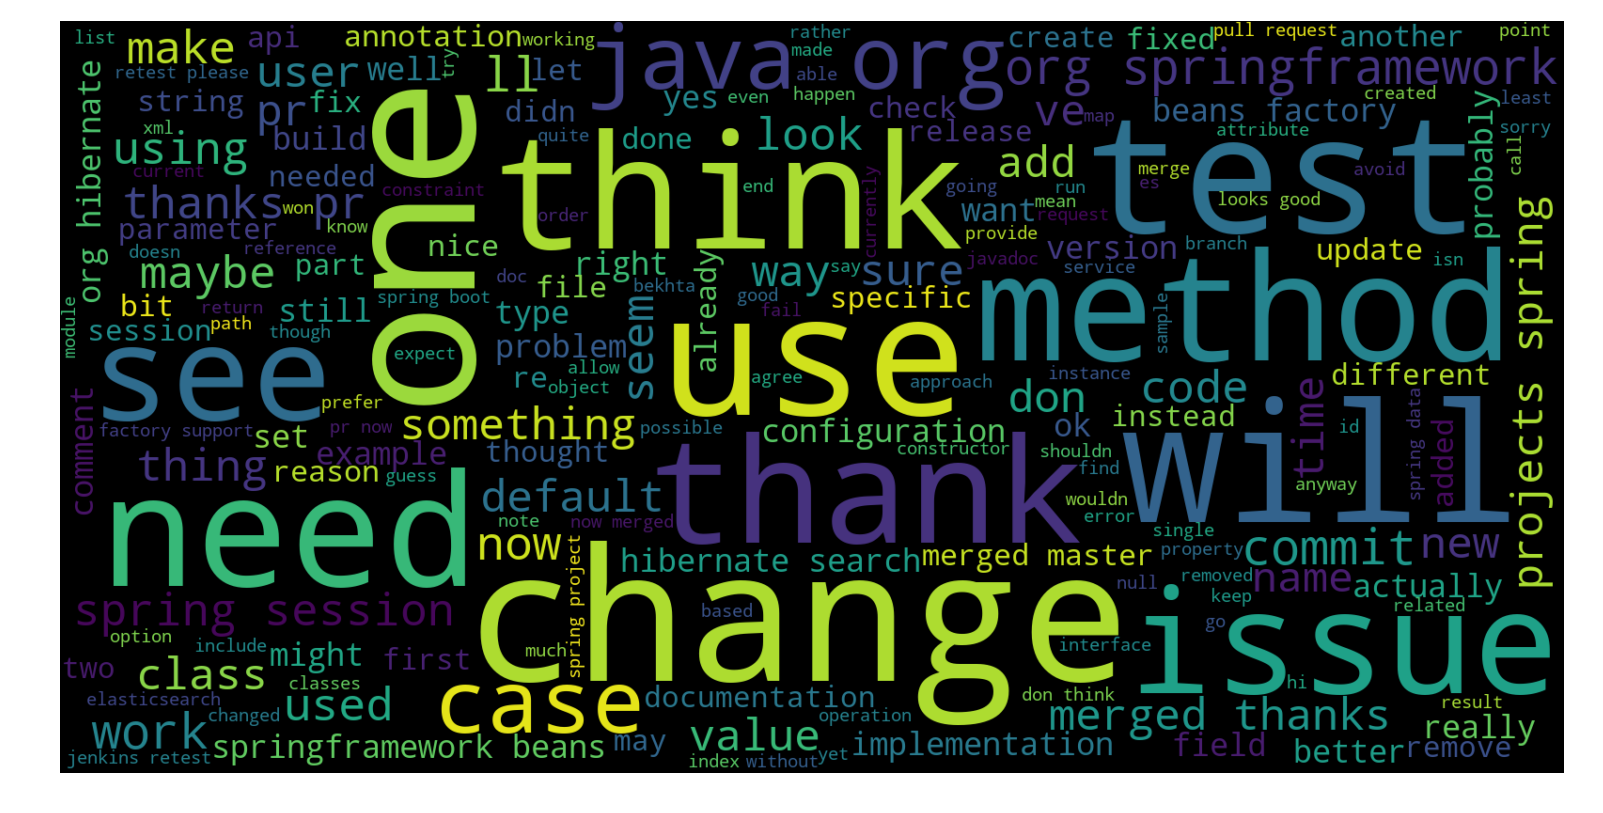

In [331]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(words_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### From the word cloud we can say that the most problems  in comments are asking for change, test, fix the issue 

###### Further relations can be found by building a Word2vec model and using it to cluster by KNN

In [303]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk
nltk.download('punkt')
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(words_string) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dashr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [308]:
for w in counts:
    if w[0]=='issue':
        print(w)
    if w[0]=='change':
        print(w)
    if w[0]=='test':
        print(w)


('test', 390)
('change', 261)
('issue', 234)


#### I tried removing stopwords and then counted no. of times each the stop word has occured  and based on these results we can tag the comments with class like  test , change_request , issue , general_comment and then cluster them

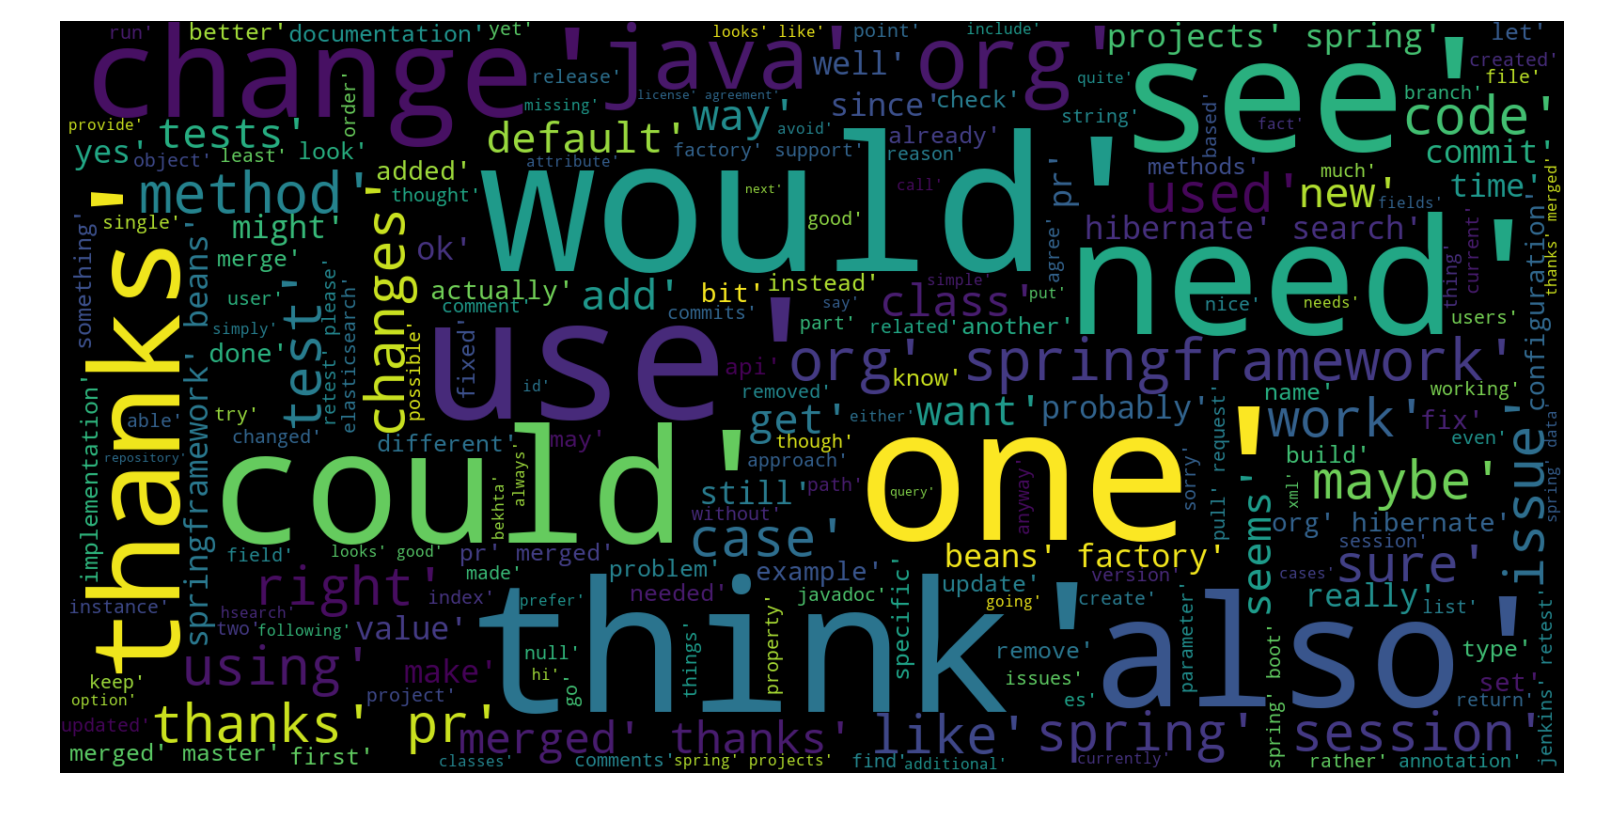

In [305]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(filtered_sentence))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()